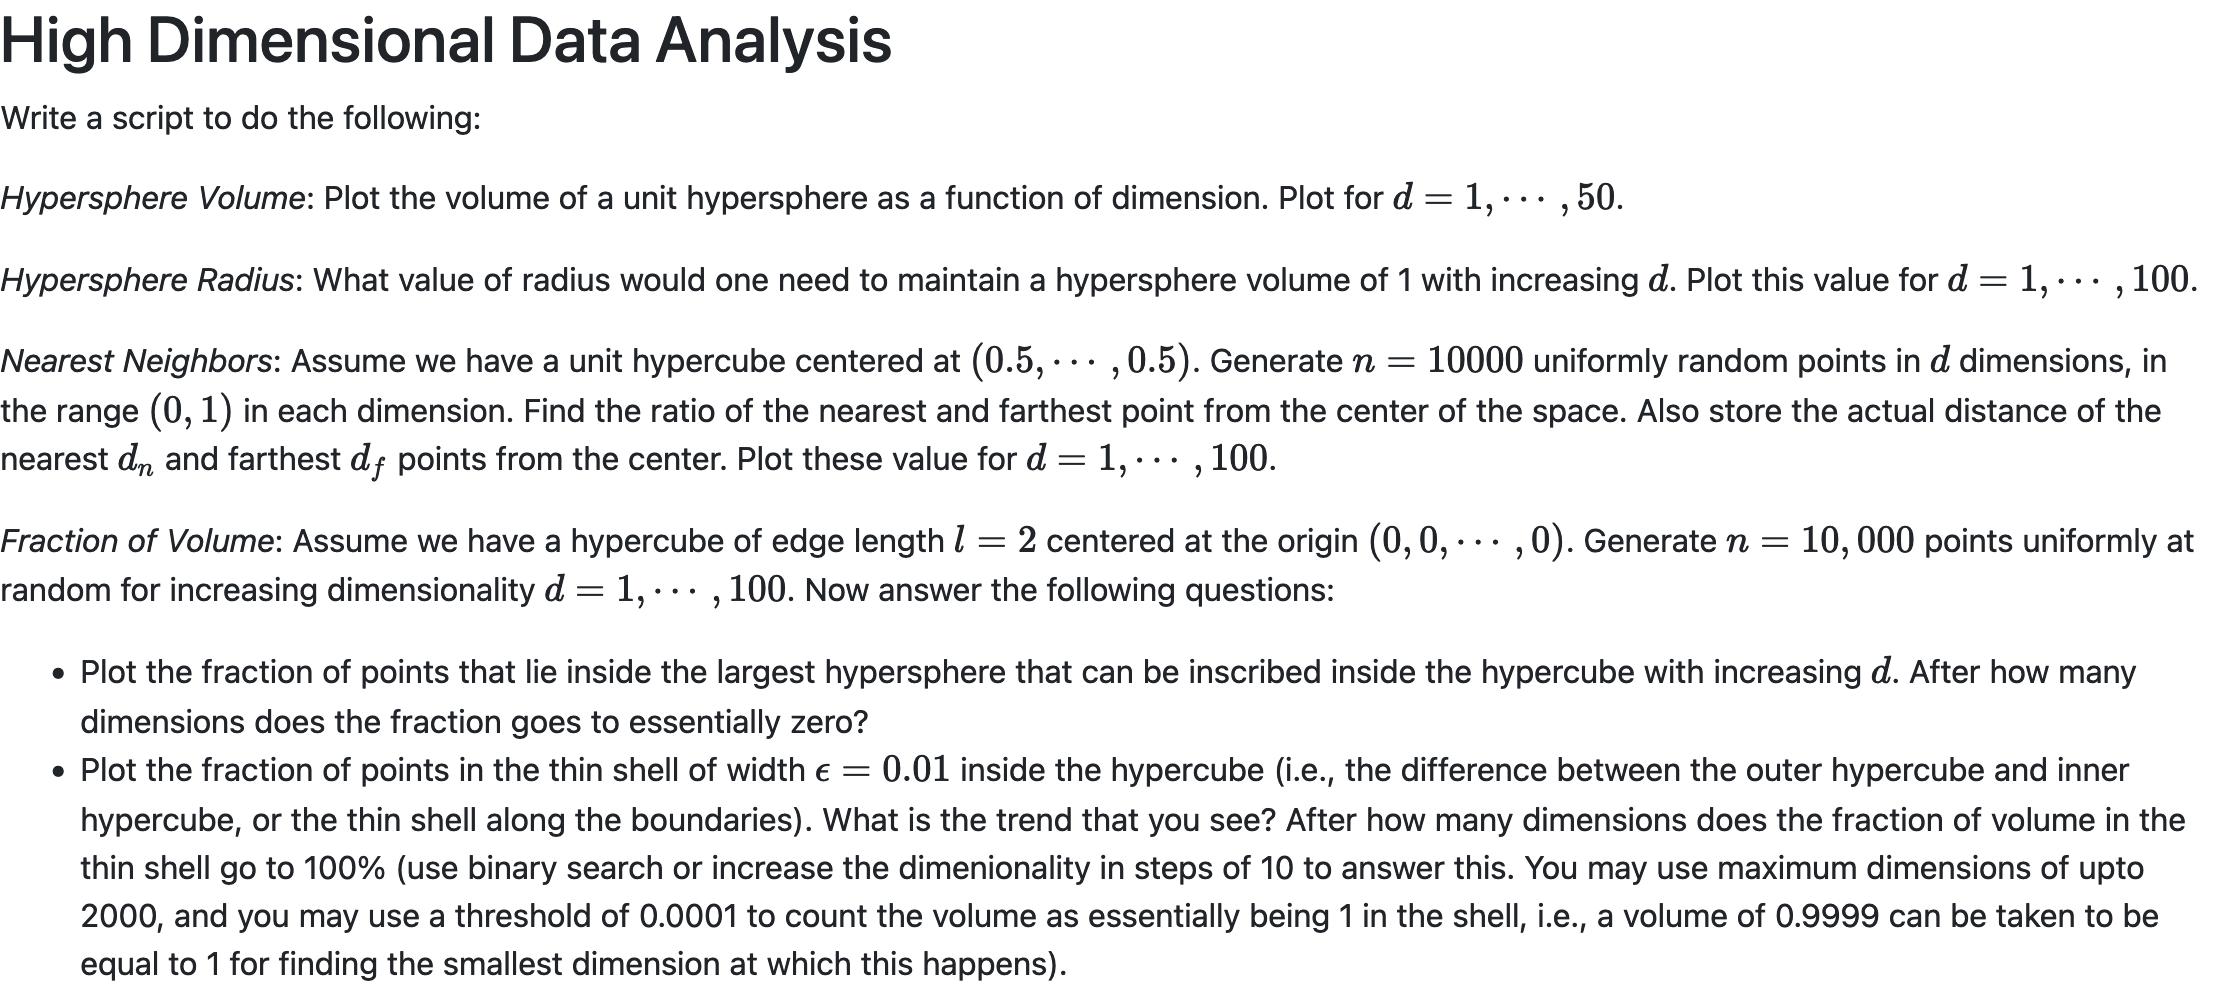

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import gamma

%matplotlib inline

In [2]:
np.random.seed(2024)

## Hypersphere Volume

In [3]:
d = np.arange(1, 51)
sphere_volume = np.power(np.pi, d/2) / gamma(d/2 + 1)

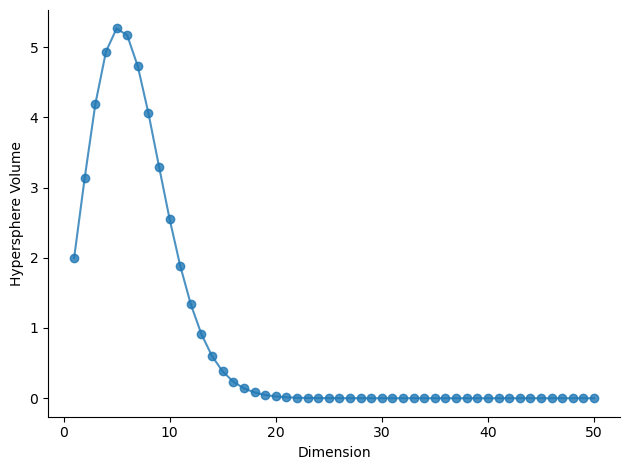

In [4]:
fig, ax = plt.subplots()
ax.plot(d, sphere_volume, '-o', alpha=0.8)
ax.set_xlabel('Dimension')
ax.set_ylabel('Hypersphere Volume')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Hypersphere Radius

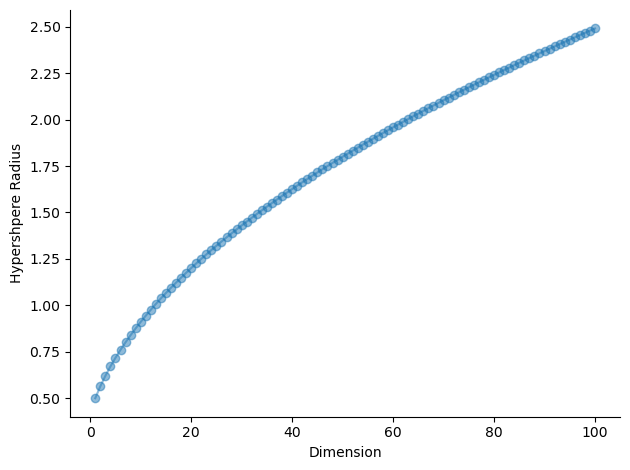

In [5]:
d = np.arange(1, 101)
unit_sphere_volume = np.power(np.pi, d/2) / gamma(d/2 + 1)
radius = np.exp(-np.log(unit_sphere_volume) / d)

fig, ax = plt.subplots()
ax.plot(d, radius, '-o', alpha=0.5)
ax.set_xlabel('Dimension')
ax.set_ylabel('Hypershpere Radius')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Nearest Neighbors

In [6]:
def nearest_farthest_distance(d):
    center = np.ones(d) * 0.5
    points = np.random.uniform(size=(10000, d))
    distance = np.sqrt(((points - center) ** 2).sum(axis=1))

    nearest_distance = distance.min()
    farthest_distance = distance.max()
    ratio = nearest_distance / farthest_distance
    
    return nearest_distance, farthest_distance, ratio


In [7]:
d = np.arange(1, 101)
neighbors = np.vectorize(nearest_farthest_distance)
nearest, farthest, ratio = neighbors(d)

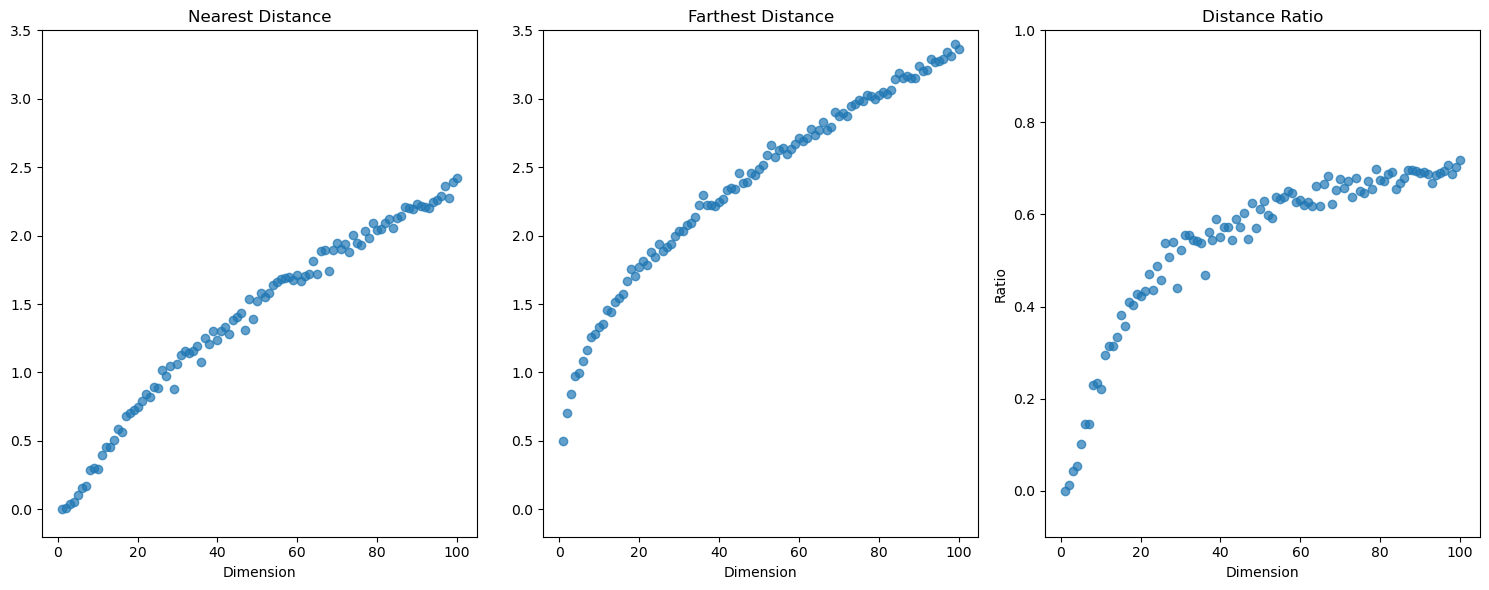

In [8]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 6))

axes[0].scatter(d, nearest, alpha=0.7)
axes[0].set(title='Nearest Distance', xlabel='Dimension', ylim=(-0.2, 3.5))

axes[1].scatter(d, farthest, alpha=0.7)
axes[1].set(title='Farthest Distance', xlabel='Dimension', ylim=(-0.2, 3.5))

axes[2].scatter(d, ratio, alpha=0.7)
axes[2].set(title='Distance Ratio', xlabel='Dimension', ylabel='Ratio', ylim=(-0.1, 1))

plt.tight_layout()
plt.show()

## Fraction of Volume

In [9]:
def inside_hypersphere(d):
    points = np.random.uniform(low=-1, high=1, size=(10000, d))
    distance = np.linalg.norm(points, axis=1)
    return (distance < 1).mean()

d = np.arange(1, 101)
fraction_sphere = np.vectorize(inside_hypersphere)
fractions = fraction_sphere(d)

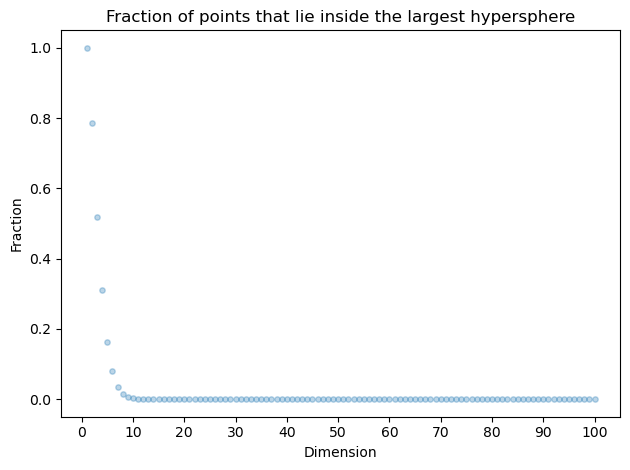

In [10]:
plt.scatter(d, fractions, alpha=0.3, s=15)
plt.ylabel('Fraction')
plt.xlabel('Dimension')
plt.title('Fraction of points that lie inside the largest hypersphere')
plt.xticks(range(0, 110, 10))
plt.tight_layout()
plt.show()

In [11]:
epsilon = 0.01

def inside_thin_shell(d):
    points = np.random.uniform(low=-1, high=1, size=(10000, d))
    in_innercube = (points.max(axis=1) <= 1 - epsilon) & (points.min(axis=1) >= epsilon)
    return 1 - in_innercube.mean()

d = np.arange(1, 101)
fraction_thinshell = np.vectorize(inside_thin_shell)
fractions = fraction_thinshell(d)

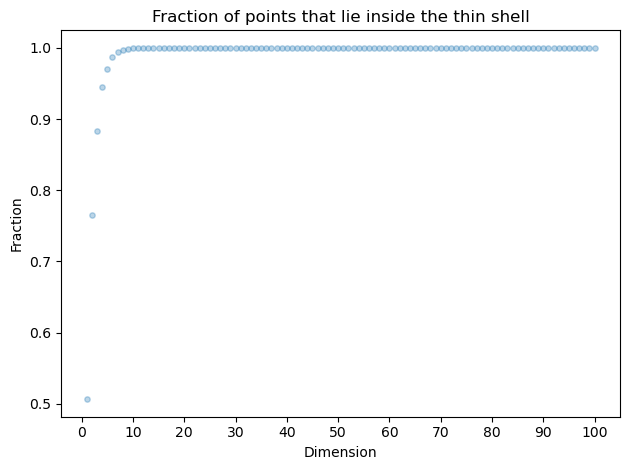

In [12]:
plt.scatter(d, fractions, alpha=0.3, s=15)
plt.ylabel('Fraction')
plt.xlabel('Dimension')
plt.title('Fraction of points that lie inside the thin shell')
plt.xticks(range(0, 110, 10))
plt.tight_layout()
plt.show()

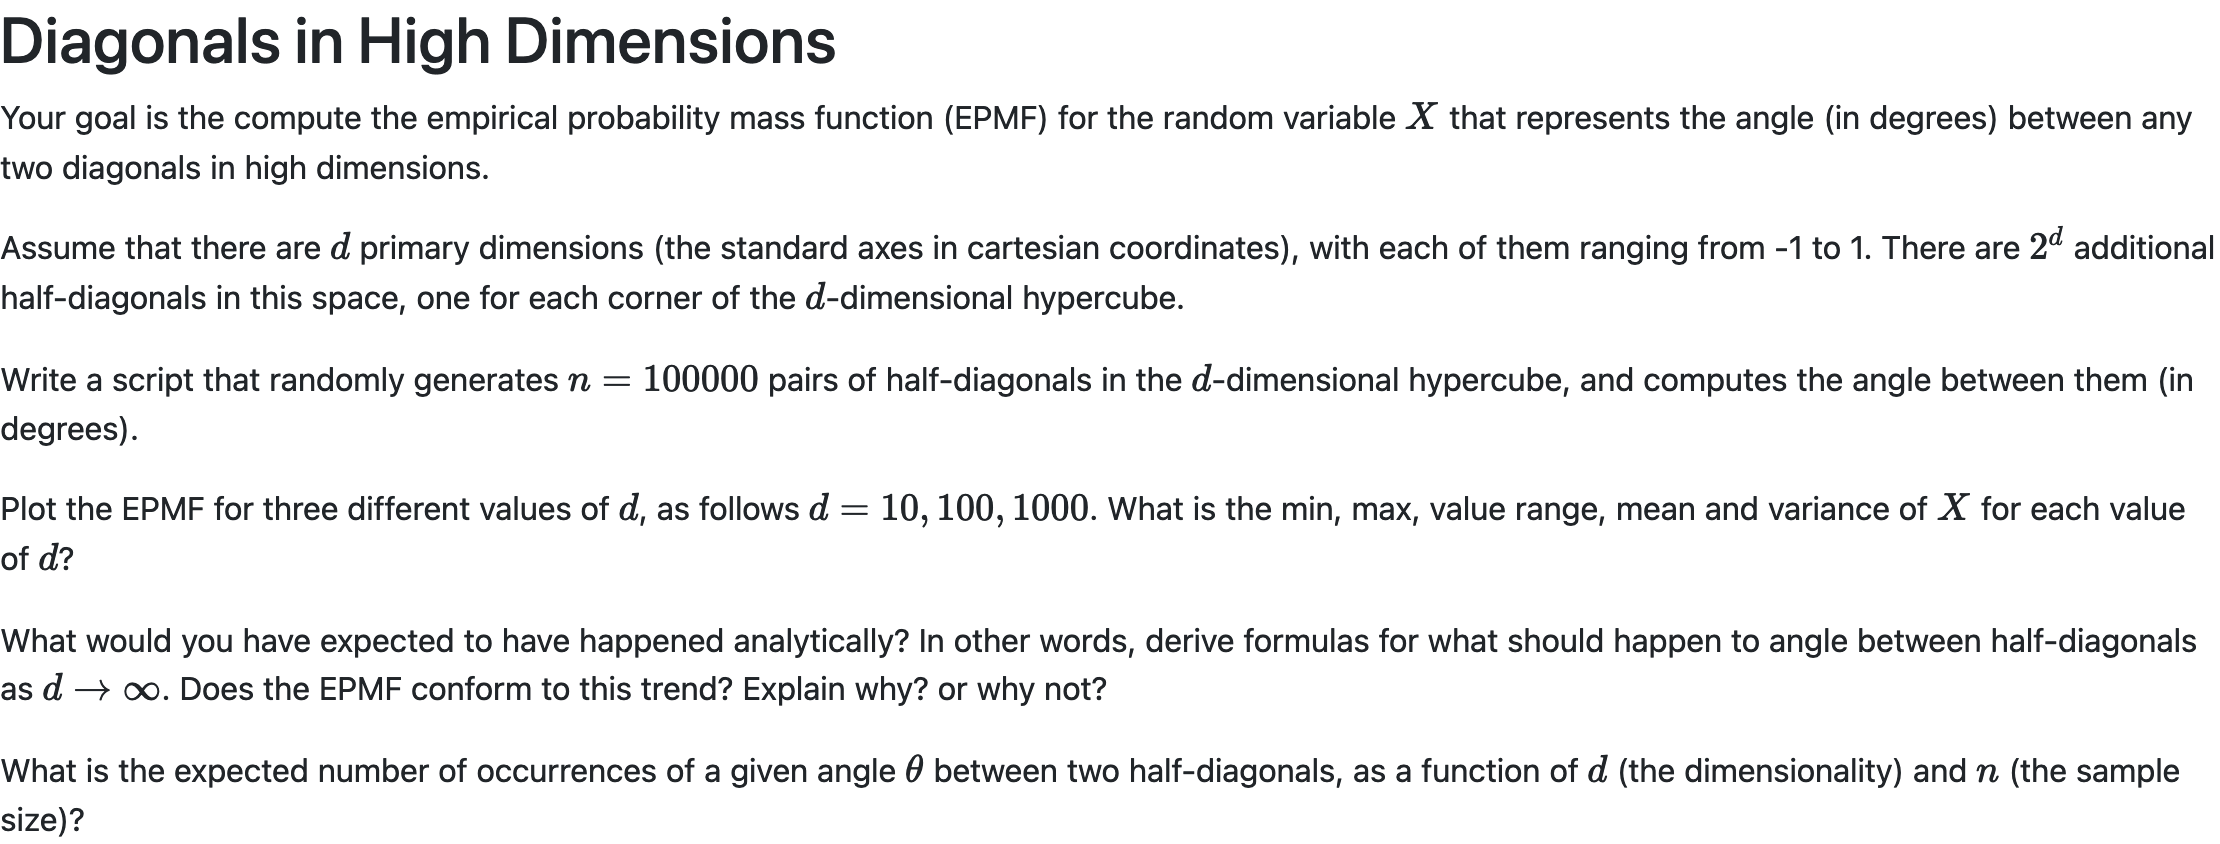

In [13]:
def plot_angles(d):
    first_diagonal = np.random.choice([-1.0, 1.0], size=(10000, d))
    second_diagonal = np.random.choice([-1.0, 1.0], size=(10000, d))
    cosine_sim = np.diag(first_diagonal @ second_diagonal.T) / (
        np.linalg.norm(first_diagonal, axis=1) * np.linalg.norm(second_diagonal, axis=1)
    )

    angles = np.arccos(cosine_sim) / np.pi * 180

    sns.histplot(x=angles, kde=True, stat='proportion')
    plt.xticks(range(30, 165, 15))
    plt.title(f"d = {d}")
    plt.show()

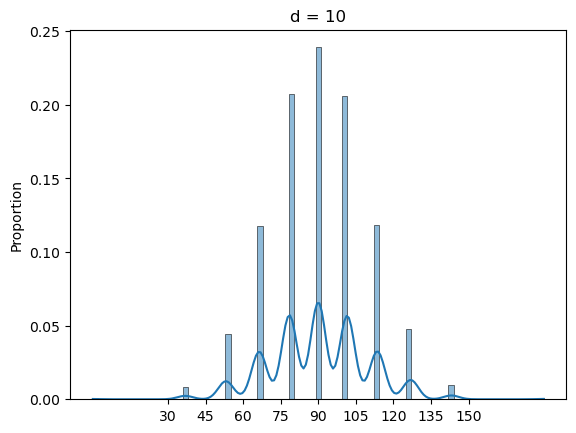

In [14]:
plot_angles(10)

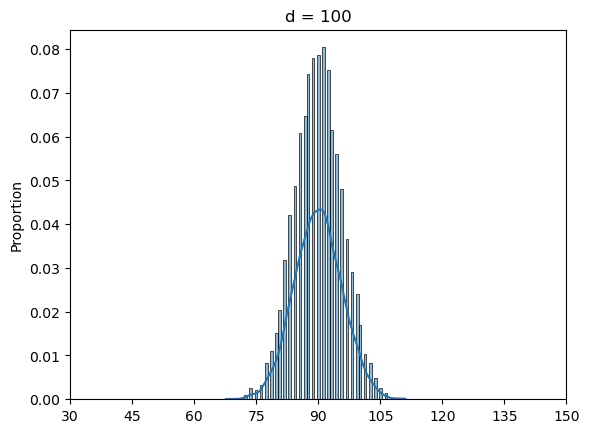

In [15]:
plot_angles(100)

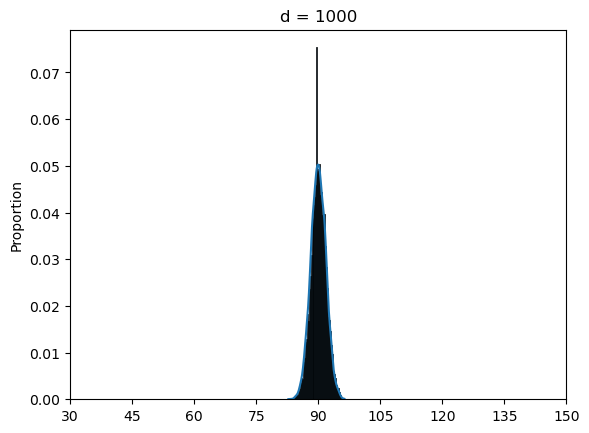

In [16]:
plot_angles(1000)